In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV

In [11]:
X_train = pd.read_csv('../data/train/X_train.csv')
X_test = pd.read_csv('../data/test/X_test.csv')
y_train = pd.read_csv('../data/train/y_train.csv').values.ravel()  # `.values.ravel()` flattens the target array if it's a DataFrame
y_test = pd.read_csv('../data/test/y_test.csv').values.ravel() 

Following the paper:
1. First, we train nine different popular machine learning models and
analyze their performance.
2. Secondly, we form two ensemble models: one consists of the nine
classifiers, and another consists of the top three performing models.
The performance of these ensemble approaches is evaluated.
3. Thirdly, the model with the highest accuracy is selected to include
in a Desktop based application.
4. Finally, a user application is developed, and the best-performing
machine learning model is adopted to forecast loan defaulters.

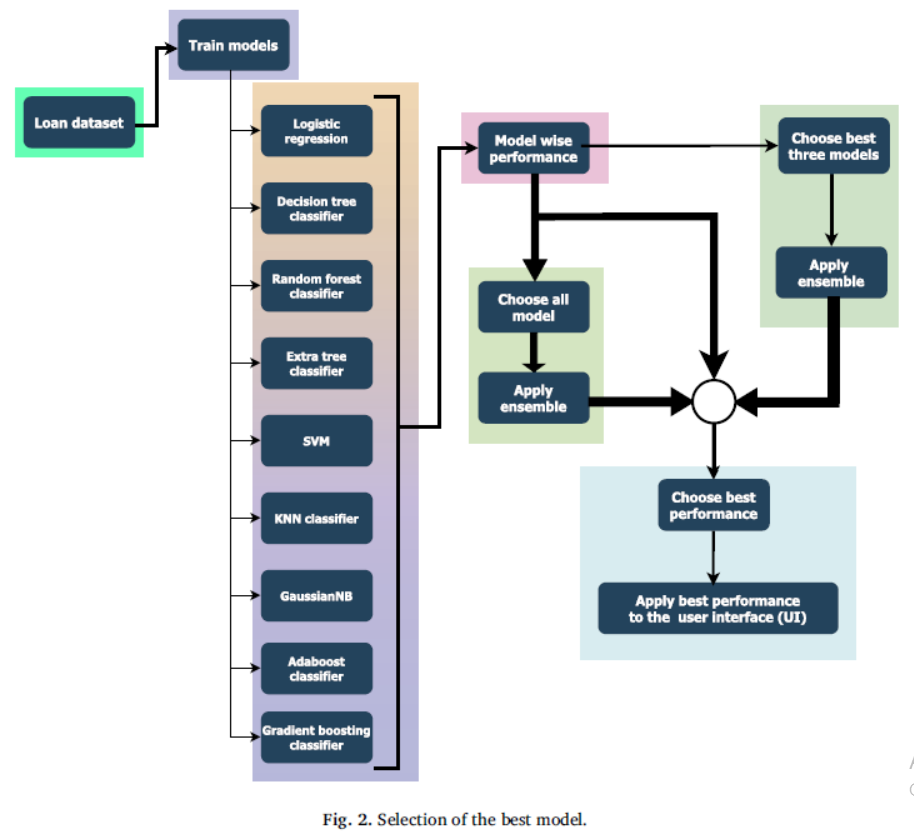

In [12]:
# Set the experiment name
mlflow.set_experiment("Model Comparison and Hyperparameter Tuning")

# Enable autologging
mlflow.sklearn.autolog()

In [13]:
param_grids = {
    "LR": {"C": [0.1, 1, 10], "penalty": ["l2"]},
    "DT": {"max_depth": [5, 10, None], "criterion": ["gini", "entropy"]},
    "RF": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]},
    "ET": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "KNN": {"n_neighbors": [3, 5, 7]},
    "AdB": {"n_estimators": [50, 100]},
    "GBC": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 0.2]},
}

In [18]:
metrics = {}

for name, model in models.items():
    print(f"Training and tuning {name}...")
    
    # Perform Grid Search
    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], cv=5, scoring="accuracy")
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        best_model = model
        best_params = None
        best_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Evaluate model
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Log metrics with MLflow
    with mlflow.start_run(run_name=name):
        mlflow.log_param("Best_Params", best_params)
        mlflow.log_metric("Accuracy", accuracy)
        mlflow.log_metric("Precision_Yes", report['1']['precision'])
        mlflow.log_metric("Recall_Yes", report['1']['recall'])
        mlflow.log_metric("F1-Score_Yes", report['1']['f1-score'])
        mlflow.log_metric("Precision_No", report['0']['precision'])
        mlflow.log_metric("Recall_No", report['0']['recall'])
        mlflow.log_metric("F1-Score_No", report['0']['f1-score'])
    
    # Store metrics for visualization
    metrics[name] = {
        'Accuracy': accuracy,
        'Precision_Yes': report['1']['precision'],
        'Recall_Yes': report['1']['recall'],
        'F1-Score_Yes': report['1']['f1-score'],
        'Precision_No': report['0']['precision'],
        'Recall_No': report['0']['recall'],
        'F1-Score_No': report['0']['f1-score'],
    }

# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics).T

metrics_df.to_csv('../logs/metrics.csv', index=False)
print(metrics_df)

2025/01/26 12:11:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '826c822878da443186f86e39ecbf7321', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/01/26 12:11:33 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers

Training and tuning LR...


d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Training and tuning DT...


2025/01/26 12:11:44 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:11:52 INFO mlflow.sklearn.utils: Logging the 5 best runs, one run will be omitted.
2025/01/26 12:11:52 INFO mlflow.uti

Training and tuning RF...


2025/01/26 12:11:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:12:06 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.
2025/01/26 12:12:07 INFO mlflow.util

Training and tuning ET...


2025/01/26 12:12:11 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:12:19 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.
2025/01/26 12:12:20 INFO mlflow.util

Training and tuning SVM...


2025/01/26 12:12:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:12:28 INFO mlflow.sklearn.utils: Logging the 5 best runs, one run will be omitted.
2025/01/26 12:12:28 INFO mlflow.uti

Training and tuning KNN...


2025/01/26 12:12:29 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:12:36 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.
2025/01/26 12:12:36 INFO mlflow.uti

Training and tuning GNB...


2025/01/26 12:12:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:12:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-R

Training and tuning AdB...


2025/01/26 12:12:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:12:50 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.
2025/01/26 12:12:50 INFO mlflow.uti

Training and tuning GBC...


2025/01/26 12:12:53 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Loan-Approval-Prediction-Reimplementation\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/26 12:13:01 INFO mlflow.sklearn.utils: Logging the 5 best runs, one run will be omitted.


     Accuracy  Precision_Yes  Recall_Yes  F1-Score_Yes  Precision_No  \
LR   0.683333       0.750000    0.769231      0.759494      0.550000   
DT   0.716667       0.775000    0.794872      0.784810      0.600000   
RF   0.775000       0.774194    0.923077      0.842105      0.777778   
ET   0.733333       0.739583    0.910256      0.816092      0.708333   
SVM  0.708333       0.759036    0.807692      0.782609      0.594595   
KNN  0.658333       0.712644    0.794872      0.751515      0.515152   
GNB  0.708333       0.772152    0.782051      0.777070      0.585366   
AdB  0.741667       0.764045    0.871795      0.814371      0.677419   
GBC  0.733333       0.780488    0.820513      0.800000      0.631579   

     Recall_No  F1-Score_No  
LR    0.523810     0.536585  
DT    0.571429     0.585366  
RF    0.500000     0.608696  
ET    0.404762     0.515152  
SVM   0.523810     0.556962  
KNN   0.404762     0.453333  
GNB   0.571429     0.578313  
AdB   0.500000     0.575342  
GBC   0.5

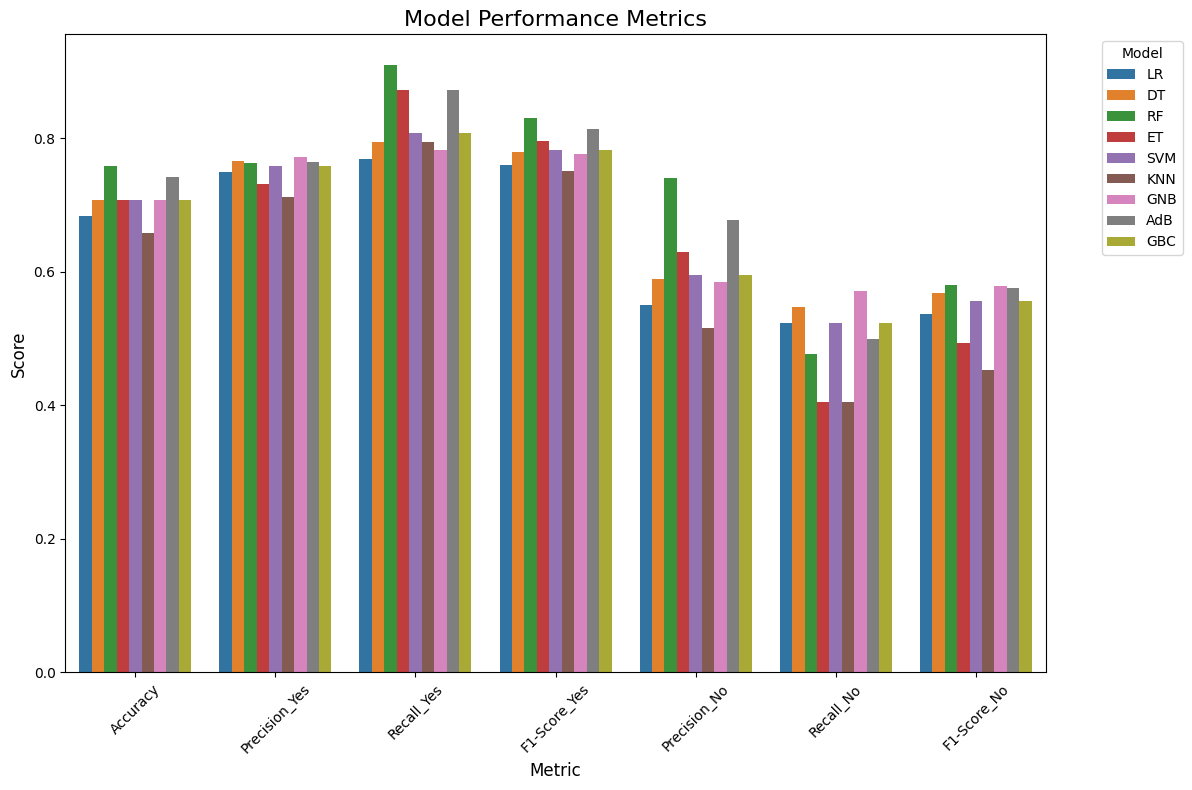

In [15]:
# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics).T  # Transpose to get models as rows

# Reset the index to convert the model names into a column
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'Model'}, inplace=True)

# Melt the DataFrame to make it long-form (tidy)
tidy_metrics_df = metrics_df.melt(id_vars='Model', 
                                  var_name='Metric', 
                                  value_name='Score')

# Plot the bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=tidy_metrics_df, x='Metric', y='Score', hue='Model')
plt.title('Model Performance Metrics', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()